**Import libraries**

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc
from mpl_toolkits import mplot3d
from array import *
from scipy.integrate import *
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy.random import normal
from numpy import hstack

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import FuncFormatter, MultipleLocator

!pip install pymannkendall
import pymannkendall as mk

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
# plt.rcParams['figure.figsize'] = [10.24, 7.6]
# plt.rcParams['figure.dpi'] = 300

**extracting csv file and assigning headers**

In [2]:
data = pd.read_csv("locan_1.csv", delimiter=',', header=None, names =['sno', 'day', 'yy', 'mo','dd','total_wl','precipitation','streamflow','skewsurge','yymo','emp_pcp','emp_twl','emp_sflow','emp_skewv'
])
data = data.dropna() #remove rows and columns with Null/NaN values.
#data.columns =['index', 'dd', 'yy', 'mo','day_','total_wl','precipitation','streamflow','skewsurge'] 
key=data.iloc[:,0]
date = data.iloc[:, 1]
year = data.iloc[:, 2]
month= data.iloc[:, 3]
day  = data.iloc[:, 4]
TWL  = data.iloc[:, 5]  #total water level
pcp  = data.iloc[:, 6]  #precipitation
s_flow=data.iloc[:, 7]  #streamflow
skew_surge=data.iloc[:, 8] #skew surge 


In [3]:
# plt.hist(data.precipitation, bins=50)
# plt.show()
# ecdf_pcp = ECDF(data.precipitation)
# # get cumulative probability for values
# print('P(x<0): %.3f' % ecdf_pcp(0))
# print('P(x<10): %.3f' % ecdf_pcp(10))
# print('P(x<20): %.3f' % ecdf_pcp(20))
# # plot the cdf
# plt.plot(ecdf_pcp.x, ecdf_pcp.y)
# plt.show()

In [4]:
# plt.plot(ecdf_pcp.x[0:100])

In [5]:
# y=pd.DataFrame(ecdf_pcp.x)
# y(4.46)

In [6]:
nao_data = pd.read_csv("nao.csv", delimiter=',', header=None, names =['nao_yymmo', 'nao_index'])
nao_data = nao_data.dropna() #remove rows and columns with Null/NaN values.
nao_data.nao_yymmo[0]

196501

In [7]:
data

,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv
0,1,01-01-1965,1965,1,1,1.500,4.46,110.0,0.099,196501,0.717965,0.851460,0.784139,0.654469
1,2,01-02-1965,1965,1,2,1.570,8.62,87.8,0.116,196501,0.814357,0.910366,0.722109,0.695397
2,3,01-03-1965,1965,1,3,1.620,0.00,77.9,0.137,196501,0.236580,0.939054,0.687046,0.741425
3,4,01-04-1965,1965,1,4,1.750,0.00,75.9,0.258,196501,0.236580,0.979600,0.679906,0.911386
4,5,01-05-1965,1965,1,5,1.630,15.40,72.5,0.158,196501,0.897233,0.942815,0.665115,0.779102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,15682,12/27/2011,2011,12,27,1.481,0.00,21.5,-0.029,201112,0.236580,0.830040,0.230779,0.304794
15682,15683,12/28/2011,2011,12,28,1.558,0.54,19.6,0.035,201112,0.470164,0.898126,0.202474,0.477241
15683,15684,12/29/2011,2011,12,29,1.615,2.18,17.8,0.181,201112,0.619916,0.934273,0.175698,0.817672
15684,15685,12/30/2011,2011,12,30,1.388,0.21,16.2,0.048,201112,0.303519,0.696098,0.149815,0.510901


In [8]:
nao_data

,nao_yymmo,nao_index
0,196501,-0.12
1,196502,-1.55
2,196503,-1.51
3,196504,0.72
4,196505,-0.62
...,...,...
559,201108,-1.35
560,201109,0.54
561,201110,0.39
562,201111,1.36


**Merrging data frames nao and data**

In [9]:
data = pd.merge(data, nao_data, how='inner', left_on = 'yymo', right_on = 'nao_yymmo')
data

,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index
0,1,01-01-1965,1965,1,1,1.500,4.46,110.0,0.099,196501,0.717965,0.851460,0.784139,0.654469,196501,-0.12
1,2,01-02-1965,1965,1,2,1.570,8.62,87.8,0.116,196501,0.814357,0.910366,0.722109,0.695397,196501,-0.12
2,3,01-03-1965,1965,1,3,1.620,0.00,77.9,0.137,196501,0.236580,0.939054,0.687046,0.741425,196501,-0.12
3,4,01-04-1965,1965,1,4,1.750,0.00,75.9,0.258,196501,0.236580,0.979600,0.679906,0.911386,196501,-0.12
4,5,01-05-1965,1965,1,5,1.630,15.40,72.5,0.158,196501,0.897233,0.942815,0.665115,0.779102,196501,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,15682,12/27/2011,2011,12,27,1.481,0.00,21.5,-0.029,201112,0.236580,0.830040,0.230779,0.304794,201112,2.52
15682,15683,12/28/2011,2011,12,28,1.558,0.54,19.6,0.035,201112,0.470164,0.898126,0.202474,0.477241,201112,2.52
15683,15684,12/29/2011,2011,12,29,1.615,2.18,17.8,0.181,201112,0.619916,0.934273,0.175698,0.817672,201112,2.52
15684,15685,12/30/2011,2011,12,30,1.388,0.21,16.2,0.048,201112,0.303519,0.696098,0.149815,0.510901,201112,2.52


In [10]:
# i=0
# d = dict()
# while i <len(nao_data):
#   d[nao_data.naoyymo[i]] = nao_data.nao_index[i]
#   i+=1
# # print(d)
# i=0
# l=[]
# while i<len(data):
#   l.append(d[data.yymo[i]])
#   i+=1
# data['nao_yymmo'] = l
# print(data)

In [11]:
#plt.plot(year, TWL)

In [12]:
#plt.plot(month, TWL)

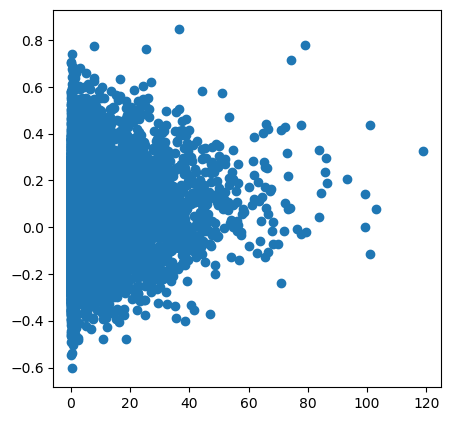

In [13]:
plt.scatter(pcp, skew_surge )

**kendal test for complete data**

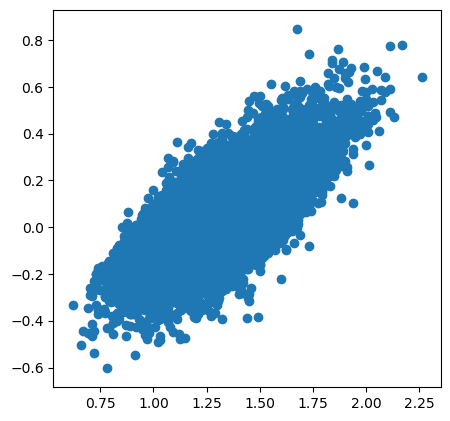

Kendall correlation coefficient: 0.456
Samples are correlated (reject H0) p=0.000


In [14]:
plt.scatter(TWL, skew_surge)
plt.show()   # each var has uniform dstrbn & +ve associan b/w the vars is visible by the diagonal grouping of the points from the bottom left to the top right of the plot.
coef, p = kendalltau(TWL, skew_surge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [15]:
#plt.scatter(pcp, skew_surge)
#plt.show()   # each var has uniform dstrbn & +ve associan b/w the vars is visible by the diagonal grouping of the points from the bottom left to the top right of the plot.
coef, p = kendalltau(pcp, skew_surge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

Kendall correlation coefficient: 0.084
Samples are correlated (reject H0) p=0.000


In [16]:
#plt.scatter(TWL,s_flow )
coef, p = kendalltau(TWL, s_flow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

Kendall correlation coefficient: -0.090
Samples are correlated (reject H0) p=0.000


In [17]:
coef, s = spearmanr(TWL, skew_surge)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if s > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % s)
else:
	print('Samples are correlated (reject H0) p=%.3f' % s)  # null hypothesis H0 states that there is no effect or relationship between the variables.

Spearmans correlation coefficient: 0.632
Samples are correlated (reject H0) p=0.000


**95 percentile of twl, pcp, sflow** 

In [18]:
r95twl= np.percentile(TWL, 95) # return 95th percentile, e.g median.
print (r95twl)
r95pcp = np.percentile(pcp, 95) 
print (r95pcp)
r95sflow = np.percentile(s_flow, 95) 
print (r95sflow)

1.65
24.4
283.75


**TWL95(>1.65) corresponding +/-1days precipitation maxima as a single compound event**

In [19]:
index_twl95 = []     #empty list 
twl95_maxlist=[]
index_twl95 = data.sno[data.total_wl > 1.65] # to store all indexes which has totalwater level greater than 1.65

index_twl95 = [d+i-1 for d in index_twl95 for i in range(-1,2)]  #append indices of +/- 1 day 
#print(index_twl95)
# data.loc[index_twl95]
precp_twl95 = list(data.precipitation[index_twl95])  #list of precipitation on all these days(+/- 1 day )
sno_precp_twl95 = list(data.sno[index_twl95])
print(precp_twl95)
print(sno_precp_twl95)

final_max_precep_twl95 = []
indeces_final_max_precep_twl95 = []
i=0

while i<len(precp_twl95):
  final_max_precep_twl95.append(max(precp_twl95[i:i+3])) #appending max of 3days as one event into the list
  largest_idx = i 

  if precp_twl95[largest_idx] < precp_twl95[i+1]:
    largest_idx = i+1
  if precp_twl95[largest_idx] < precp_twl95[i+2]:
    largest_idx = i+2

  indeces_final_max_precep_twl95.append(sno_precp_twl95[largest_idx]) #storing respecitve indice for one compound event (max of 3days)
  i+=3

print(len(final_max_precep_twl95))
print(final_max_precep_twl95)
print(indeces_final_max_precep_twl95)
max_precp_twl95 = data.loc[indeces_final_max_precep_twl95].copy()  #new data frame having the max precip for twl95
max_precp_twl95
max_precp_twl95.to_csv(r'max_precp_twl95.csv')

[0.0, 0.0, 15.4, 1.38, 0.21, 23.1, 0.21, 23.1, 1.73, 5.71, 11.9, 2.76, 5.19, 2.41, 0.21, 25.0, 7.09, 0.0, 10.0, 66.4, 13.4, 66.4, 13.4, 1.89, 1.03, 7.78, 5.7, 7.78, 5.7, 5.35, 0.0, 0.0, 10.5, 0.0, 10.5, 14.0, 1.24, 43.8, 1.73, 5.14, 11.7, 14.7, 14.7, 10.2, 5.19, 49.4, 15.4, 5.19, 12.8, 0.21, 13.1, 2.8, 9.97, 0.3, 9.97, 0.3, 1.45, 0.3, 1.45, 0.21, 0.86, 0.0, 1.24, 0.21, 0.21, 9.54, 9.54, 13.8, 2.6, 4.32, 11.9, 0.21, 0.72, 0.21, 0.21, 20.5, 4.84, 2.6, 4.84, 2.6, 0.21, 0.51, 13.4, 13.8, 8.41, 30.3, 0.51, 3.63, 6.23, 0.51, 4.88, 6.23, 0.52, 6.23, 0.52, 20.2, 0.52, 20.2, 0.0, 28.8, 7.06, 3.11, 1.68, 0.52, 0.82, 2.9, 19.7, 4.62, 19.7, 4.62, 0.3, 7.09, 29.0, 2.28, 0.3, 2.49, 5.84, 0.0, 17.6, 0.21, 17.6, 0.21, 0.52, 14.8, 39.9, 1.73, 15.7, 9.17, 0.21, 3.97, 8.62, 4.88, 52.0, 2.8, 1.76, 0.0, 41.9, 64.8, 41.9, 64.8, 3.32, 8.93, 24.5, 31.6, 45.3, 4.32, 0.86, 4.32, 0.86, 36.8, 0.86, 36.8, 7.44, 36.8, 7.44, 0.21, 0.21, 46.8, 39.0, 46.8, 39.0, 7.44, 1.55, 6.23, 1.37, 1.03, 0.0, 2.07, 11.2, 19.8, 14.

***Frequency of compound events in all years( twl95p corresponding max precipitation)***

In [20]:
# count = data['yy'].value_counts() 
# print(count)

frequency_twl95= max_precp_twl95['yy'].value_counts() #frequency(no. of evnts) of compound event (maximum twl 95 percentile and corresponding +/-1 day max precipitation as 1 event) in all the years
frequency_twl95=frequency_twl95.copy()  #new data frame
print(frequency_twl95)
frequency_twl95.to_csv('frequency_twl95.csv')
#len(max_precp_twl95)

1997    44
2010    41
2011    39
2002    39
2009    36
2004    32
2003    27
1996    26
1988    26
1985    25
1992    22
1991    22
1995    22
1994    21
1983    19
1990    19
1989    18
2001    18
1998    17
1974    16
1986    16
1999    16
2000    15
1968    14
2006    14
2005    14
1972    14
1970    13
1982    13
1993    13
1977    11
1975    10
1979     9
1978     9
1976     9
1980     9
2008     9
1973     8
1967     8
1966     8
1981     7
1971     6
1965     5
1969     4
Name: yy, dtype: int64


 **extracting csv file  *frequency v/s year* (95p twl with max precipitation)and assigning header**

In [21]:
freq_yy_95p_twl_max_prep_data = pd.read_csv("frequency_twl95_sort.csv", delimiter=',', header=None, names =[ 'year', 'frequency'])


**Mann-Kendall Test for frequency (95p twl with max precipitation)**

Mann_Kendall_Test(trend='increasing', h=True, p=8.810763920674702e-07, z=4.916494573112293, Tau=0.5137420718816068, s=486.0, var_s=9731.333333333334, slope=0.5266106442577031, intercept=4.177871148459383)


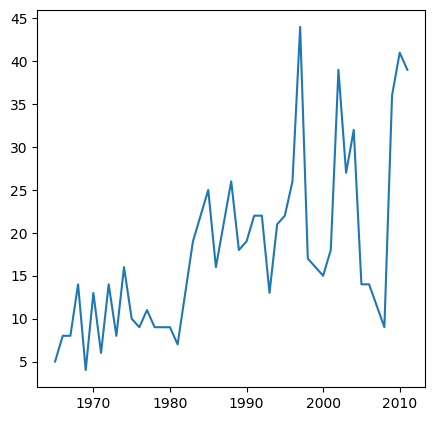

In [22]:
plt.plot(freq_yy_95p_twl_max_prep_data.year,freq_yy_95p_twl_max_prep_data.frequency)
result = mk.original_test(freq_yy_95p_twl_max_prep_data.frequency)
print(result)
# trend: tells the trend (increasing, decreasing or no trend)
# h: True (if trend is present) or False (if the trend is absence)
# p: p-value of the significance test
# z: normalized test statistics
# Tau: Kendall Tau
# s: Mann-Kendal's score
# var_s: Variance S
# slope: Theil-Sen estimator/slope
# intercept: intercept of Kendall-Theil Robust Line, for seasonal test, full period cycle consider as unit time step

**Intensity TWL95p and max precipitation**

In [23]:
#max_precp_twl95
twl95_maxlist=[]
twl95_maxlist = data.total_wl[TWL  > 1.65]
# print(twl95_maxlist)
twl95_maxlist = np.array(twl95_maxlist)
# print(twl95_maxlist)
max_precp_twl95['twl_max']= twl95_maxlist
max_precp_twl95['prec_max']=final_max_precep_twl95
max_precp_twl95['intensity'] = max_precp_twl95['emp_pcp'] + max_precp_twl95['emp_twl']
print(max_precp_twl95)
max_precp_twl95.to_csv('intensity_twl_precip_nao.csv')


         sno         day    yy  mo  dd  total_wl  precipitation  streamflow  \
5          6  01-06-1965  1965   1   6     1.610           6.53       60.30   
51        52   2/21/1965  1965   2  21     1.550           1.73        9.43   
51        52   2/21/1965  1965   2  21     1.550           1.73        9.43   
346      347  12/13/1965  1965  12  13     1.540           2.76       32.30   
360      361  12/27/1965  1965  12  27     1.660           2.41       17.40   
...      ...         ...   ...  ..  ..       ...            ...         ...   
15630  15631  10/31/2011  2011  10  31     1.715          22.70       60.20   
15649  15650  11/25/2011  2011  11  25     1.598           0.35       55.20   
15653  15654  11/29/2011  2011  11  29     1.676           2.99       45.70   
15653  15654  11/29/2011  2011  11  29     1.676           2.99       45.70   
15679  15680  12/25/2011  2011  12  25     1.659           0.21       26.00   

       skewsurge    yymo   emp_pcp   emp_twl  emp_s

Mann_Kendall_Test(trend='no trend', h=False, p=0.8709036719647549, z=0.162510739283747, Tau=0.0038836790754949325, s=1189.0, var_s=53440283.0, slope=4.201062602965405e-06, intercept=1.5531833435222404)


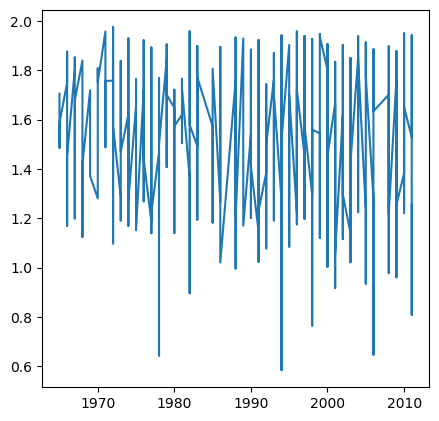

In [24]:
plt.plot(max_precp_twl95.yy,max_precp_twl95.intensity)
result = mk.original_test(max_precp_twl95.intensity)
print(result)

**Daily data total water level trend**

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=22.23586238331323, Tau=0.11836751134219124, s=14561270.0, var_s=428835267693.3333, slope=8.12045339198106e-06, intercept=1.2163153442733885)


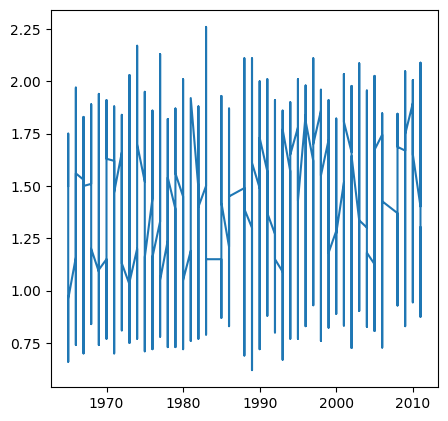

In [25]:
plt.plot(data.yy,data.total_wl)
result = mk.original_test(data.total_wl)
print(result)

**Daily data precipitation trend**

Mann_Kendall_Test(trend='no trend', h=False, p=0.6847055546601202, z=-0.4060504192634217, Tau=-0.0021459962734556655, s=-263995.0, var_s=422696046971.0, slope=0.0, intercept=0.74)


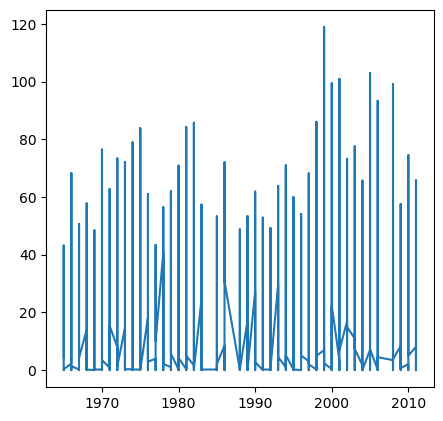

In [26]:
plt.plot(data.yy,data.precipitation)
result = mk.original_test(data.precipitation)
print(result)

**Daily data streamflow trend**

Mann_Kendall_Test(trend='increasing', h=True, p=0.0010329820055012817, z=3.281386195451187, Tau=0.01746860232151608, s=2148943.0, var_s=428878914119.0, slope=0.00020700037636432059, intercept=45.07659954836282)


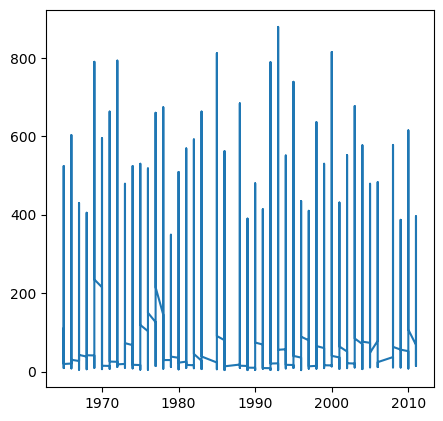

In [27]:
plt.plot(data.yy,data.streamflow)
result = mk.original_test(data.streamflow)
print(result)

In [28]:
max_precp_twl95

,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
5,6,01-06-1965,1965,1,6,1.610,6.53,60.30,0.109,196501,0.771707,0.933508,0.598240,0.679268,196501,-0.12,1.750,15.40,1.705215
51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,0.102,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.690,23.10,1.485656
51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,0.102,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.680,23.10,1.485656
346,347,12/13/1965,1965,12,13,1.540,2.76,32.30,0.188,196512,0.646436,0.887926,0.364656,0.829275,196512,1.37,1.670,11.90,1.534362
360,361,12/27/1965,1965,12,27,1.660,2.41,17.40,0.229,196512,0.632475,0.954737,0.170215,0.881295,196512,1.37,1.660,5.19,1.587212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,15631,10/31/2011,2011,10,31,1.715,22.70,60.20,0.397,201110,0.942751,0.970419,0.597412,0.979026,201110,0.39,1.715,33.70,1.913171
15649,15650,11/25/2011,2011,11,25,1.598,0.35,55.20,0.091,201111,0.424646,0.922734,0.565090,0.631837,201111,1.36,1.682,50.10,1.347380
15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.70,0.193,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.670,6.26,1.618896
15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.70,0.193,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.676,6.26,1.618896


In [29]:
max_precp_twl95.nao_yymmo

5        196501
51       196502
51       196502
346      196512
360      196512
          ...  
15630    201110
15649    201111
15653    201111
15653    201111
15679    201112
Name: nao_yymmo, Length: 783, dtype: int64

In [30]:
all_nao_data = pd.read_csv("intensity_twl_precip_nao.csv", delimiter=',')
all_nao_data = all_nao_data.dropna() #remove rows and columns with Null/NaN values.
all_nao_data

,Unnamed: 0,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
0,5,6,01-06-1965,1965,1,6,1.610,6.53,60.30,0.109,196501,0.771707,0.933508,0.598240,0.679268,196501,-0.12,1.750,15.40,1.705215
1,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,0.102,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.690,23.10,1.485656
2,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,0.102,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.680,23.10,1.485656
3,346,347,12/13/1965,1965,12,13,1.540,2.76,32.30,0.188,196512,0.646436,0.887926,0.364656,0.829275,196512,1.37,1.670,11.90,1.534362
4,360,361,12/27/1965,1965,12,27,1.660,2.41,17.40,0.229,196512,0.632475,0.954737,0.170215,0.881295,196512,1.37,1.660,5.19,1.587212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,15630,15631,10/31/2011,2011,10,31,1.715,22.70,60.20,0.397,201110,0.942751,0.970419,0.597412,0.979026,201110,0.39,1.715,33.70,1.913171
779,15649,15650,11/25/2011,2011,11,25,1.598,0.35,55.20,0.091,201111,0.424646,0.922734,0.565090,0.631837,201111,1.36,1.682,50.10,1.347380
780,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.70,0.193,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.670,6.26,1.618896
781,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.70,0.193,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.676,6.26,1.618896


**correlation b/w nao_index and intensity**

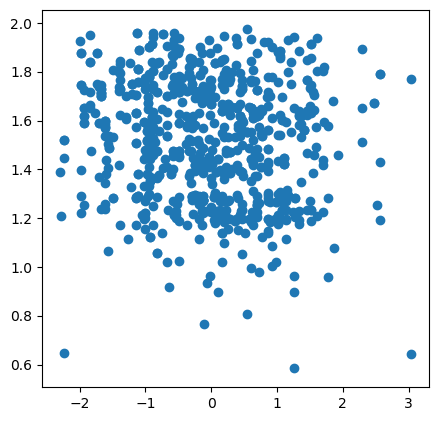

Kendall correlation coefficient: -0.096
Samples are correlated (reject H0) p=0.000


In [31]:
plt.scatter(all_nao_data.nao_index, all_nao_data.intensity)
plt.show()
coef, p = kendalltau(all_nao_data.nao_index, all_nao_data.intensity)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

**Frequency of compound event in nao positive and negative phase**

In [32]:
i=0
freq_nao_pos=0
freq_nao_neg=0
while i <len(all_nao_data):
  if all_nao_data.nao_index[i] < 0:
    freq_nao_neg+=1
  elif all_nao_data.nao_index[i] > 0:
    freq_nao_pos+=1
  i+=1
print(freq_nao_neg)
print(freq_nao_pos)

421
362


**creating dataframes for nao (pos and neg phases)**

In [33]:
naop=[]
naon=[]
naop = all_nao_data[all_nao_data.nao_index > 0]
naon = all_nao_data[all_nao_data.nao_index < 0]
# naop 
naon

,Unnamed: 0,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
0,5,6,01-06-1965,1965,1,6,1.610,6.53,60.30,0.109,196501,0.771707,0.933508,0.598240,0.679268,196501,-0.12,1.750,15.40,1.705215
1,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,0.102,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.690,23.10,1.485656
2,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,0.102,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.680,23.10,1.485656
5,369,370,01-05-1966,1966,1,5,1.680,7.09,19.30,0.290,196601,0.786625,0.961431,0.198075,0.938034,196601,-1.74,1.680,25.00,1.748056
6,374,375,01-10-1966,1966,1,10,1.970,13.40,17.20,0.442,196601,0.877980,0.997641,0.166964,0.987250,196601,-1.74,1.690,66.40,1.875622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,15339,15340,01-09-2011,2011,1,9,1.556,10.90,55.10,0.263,201101,0.848591,0.897361,0.564134,0.916741,201101,-0.88,1.715,31.70,1.745952
748,15341,15342,01-11-2011,2011,1,11,1.664,0.75,57.80,0.463,201101,0.503188,0.955374,0.581283,0.989609,201101,-0.88,1.664,2.18,1.458562
749,15350,15351,1/20/2011,2011,1,20,1.862,1.72,22.00,0.285,201101,0.582685,0.992732,0.237792,0.934910,201101,-0.88,1.862,22.80,1.575418
750,15353,15354,1/23/2011,2011,1,23,1.649,51.70,21.10,-0.002,201101,0.994326,0.947660,0.224468,0.374538,201101,-0.88,1.759,11.80,1.941986


**Correlation between nao positive phase and intensity**

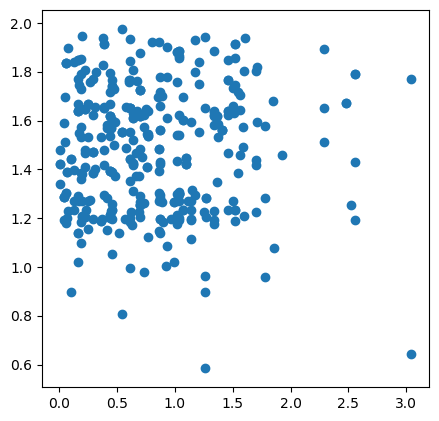

Kendall correlation coefficient: 0.034
Samples are uncorrelated (fail to reject H0) p=0.345


In [34]:
plt.scatter(naop.nao_index, naop.intensity)
plt.show()
coef, p = kendalltau(naop.nao_index, naop.intensity)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

**Correlation between nao negative phase and intensity**

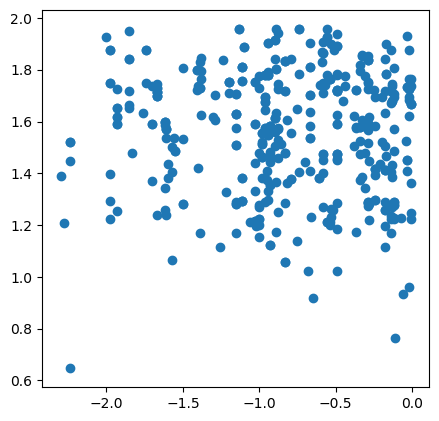

Kendall correlation coefficient: -0.049
Samples are uncorrelated (fail to reject H0) p=0.136


In [35]:
plt.scatter(naon.nao_index, naon.intensity)
plt.show()
coef, p = kendalltau(naon.nao_index, naon.intensity)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

***Frequency of compound events in all months of all years( twl95p corresponding max precipitation)***

In [36]:
frequency_monthly_twl95= max_precp_twl95['yymo'].value_counts() #frequency(no. of evnts) of compound event (maximum twl 95 percentile and corresponding +/-1 day max precipitation as 1 event) in all the months
frequency_monthly_twl95=frequency_monthly_twl95.copy()  #new data frame
print(frequency_monthly_twl95)
frequency_monthly_twl95.to_csv('frequency_monthly_twl95.csv')

200401    14
201102    13
200201    13
198912    12
199701    10
          ..
200310     1
196910     1
201008     1
200308     1
196612     1
Name: yymo, Length: 239, dtype: int64


In [37]:
frequency_monthly_twl95_sort_data = pd.read_csv("frequency_monthly_twl95_sort.csv", delimiter=',', header=None, names =[ 'year_month', 'frequency'])

In [38]:
frequency_monthly_twl95_sort_data 

,year_month,frequency
0,196501,1
1,196502,2
2,196512,2
3,196601,3
4,196602,4
...,...,...
234,201104,2
235,201109,1
236,201110,5
237,201111,3


In [39]:
frequency_monthly_twl95_sort_data = pd.merge(frequency_monthly_twl95_sort_data, nao_data, how='inner', left_on = 'year_month', right_on = 'nao_yymmo')
frequency_monthly_twl95_sort_data

,year_month,frequency,nao_yymmo,nao_index
0,196501,1,196501,-0.12
1,196502,2,196502,-1.55
2,196512,2,196512,1.37
3,196601,3,196601,-1.74
4,196602,4,196602,-1.39
...,...,...,...,...
234,201104,2,201104,2.48
235,201109,1,201109,0.54
236,201110,5,201110,0.39
237,201111,3,201111,1.36


In [40]:
frequency_monthly_twl95_sort_data

,year_month,frequency,nao_yymmo,nao_index
0,196501,1,196501,-0.12
1,196502,2,196502,-1.55
2,196512,2,196512,1.37
3,196601,3,196601,-1.74
4,196602,4,196602,-1.39
...,...,...,...,...
234,201104,2,201104,2.48
235,201109,1,201109,0.54
236,201110,5,201110,0.39
237,201111,3,201111,1.36


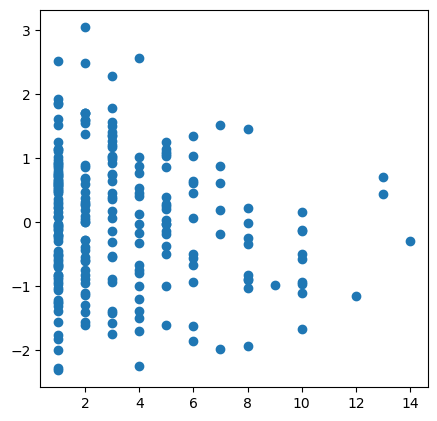

Kendall correlation coefficient: -0.065
Samples are uncorrelated (fail to reject H0) p=0.166


In [41]:
plt.scatter(frequency_monthly_twl95_sort_data.frequency, frequency_monthly_twl95_sort_data.nao_index)
plt.show()
coef, p = kendalltau(frequency_monthly_twl95_sort_data.frequency, frequency_monthly_twl95_sort_data.nao_index)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [42]:
naopp=[]
naonn=[]
naopp = frequency_monthly_twl95_sort_data[frequency_monthly_twl95_sort_data.nao_index > 0]
naonn = frequency_monthly_twl95_sort_data[frequency_monthly_twl95_sort_data.nao_index < 0]
# naop 
naonn

,year_month,frequency,nao_yymmo,nao_index
0,196501,1,196501,-0.12
1,196502,2,196502,-1.55
3,196601,3,196601,-1.74
4,196602,4,196602,-1.39
6,196701,2,196701,-0.89
...,...,...,...,...
227,201009,4,201009,-0.79
228,201010,6,201010,-0.93
229,201011,6,201011,-1.62
230,201012,6,201012,-1.85


**Correlation between nao positive phase and frequency**

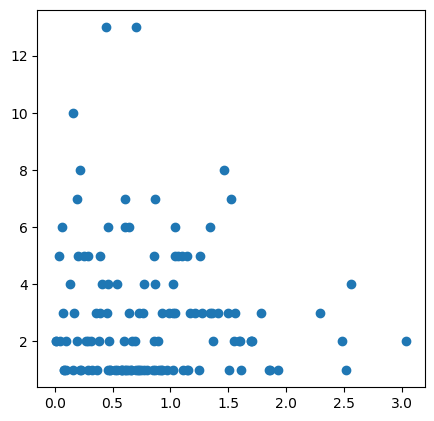

Kendall correlation coefficient: -0.021
Samples are uncorrelated (fail to reject H0) p=0.749


In [43]:
plt.scatter(naopp.nao_index, naopp.frequency)
plt.show()
coef, p = kendalltau(naopp.nao_index, naopp.frequency)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

**Correlation between nao negative phase and frequency**

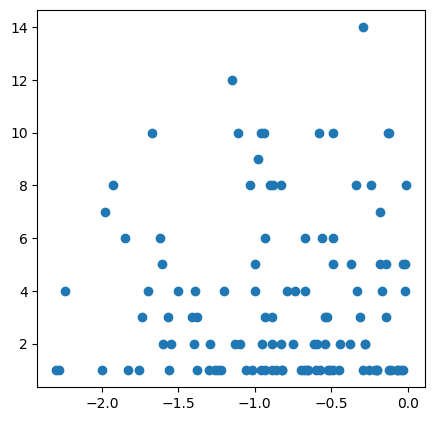

Kendall correlation coefficient: -0.002
Samples are uncorrelated (fail to reject H0) p=0.972


In [44]:
plt.scatter(naonn.nao_index, naonn.frequency)
plt.show()
coef, p = kendalltau(naonn.nao_index, naonn.frequency)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [45]:
naop

,Unnamed: 0,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
3,346,347,12/13/1965,1965,12,13,1.540,2.76,32.3,0.188,196512,0.646436,0.887926,0.364656,0.829275,196512,1.37,1.670,11.90,1.534362
4,360,361,12/27/1965,1965,12,27,1.660,2.41,17.4,0.229,196512,0.632475,0.954737,0.170215,0.881295,196512,1.37,1.660,5.19,1.587212
12,714,715,12/16/1966,1966,12,16,1.510,1.73,30.6,0.187,196612,0.589570,0.861724,0.347061,0.827744,196612,0.72,1.660,43.80,1.451294
15,764,765,02-04-1967,1967,2,4,1.660,15.40,14.9,0.271,196702,0.897233,0.954737,0.128140,0.924264,196702,0.19,1.660,49.40,1.851970
16,785,786,2/25/1967,1967,2,25,1.590,8.30,12.1,0.096,196702,0.809129,0.921841,0.082111,0.646309,196702,0.19,1.750,13.10,1.730970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,15630,15631,10/31/2011,2011,10,31,1.715,22.70,60.2,0.397,201110,0.942751,0.970419,0.597412,0.979026,201110,0.39,1.715,33.70,1.913171
779,15649,15650,11/25/2011,2011,11,25,1.598,0.35,55.2,0.091,201111,0.424646,0.922734,0.565090,0.631837,201111,1.36,1.682,50.10,1.347380
780,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.7,0.193,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.670,6.26,1.618896
781,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.7,0.193,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.676,6.26,1.618896


In [46]:
naon.to_csv('naon.csv')
naop.to_csv('naop.csv')